In [4]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

np.random.seed(72)
torch.manual_seed(72)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:

import os
print(os.getcwd())


g:\Other computers\Mac book emlyon\emlyon\Deep Learning


In [6]:
os.chdir

<function nt.chdir(path)>

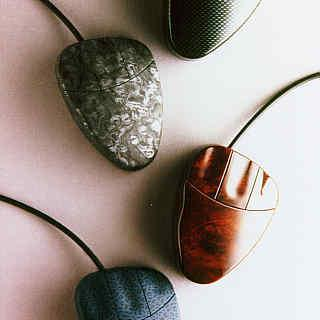

In [7]:
from PIL import Image
img=Image.open('./Foods/Foods/test/nonfood/0_0.jpg')
img


In [8]:
import torchvision
from torchvision import transforms

In [9]:
# Transforms | Augmentation
train_transforms = transforms.Compose([
    
                                    # transforms.Resize((224, 224)),
                                    #    transforms.RandomHorizontalFlip(),
                                    #    transforms.ToTensor(),
                                    
                                    transforms.RandomResizedCrop(256),
                                    transforms.RandomRotation(degrees=45),
                                    transforms.ColorJitter(hue=.05, saturation=.05),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transforms = transforms.Compose([
                                    transforms.RandomResizedCrop(256),
                                    transforms.RandomRotation(degrees=45),
                                    transforms.ColorJitter(hue=.05, saturation=.05),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]
                                    )


train_transforms(img)

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [10]:
from torchvision import datasets
train_dataset=datasets.ImageFolder('./Foods/Foods/train')

In [11]:
len(train_dataset)

3000

In [12]:
train_dataset.class_to_idx

{'food': 0, 'nonfood': 1}

In [13]:
train_dataset[0]

(<PIL.Image.Image image mode=RGB size=512x384>, 0)

In [14]:
train_dataset, val_dataset = random_split(train_dataset, [2500, 500])

len(train_dataset), len(val_dataset)

(2500, 500)

In [22]:
train_dataset.dataset.transform = train_transforms  # Apply the train_transforms on train_dataset   
val_dataset.dataset.transform = val_transforms    # Apply the val_transforms on val_dataset 

In [23]:
train_loader = DataLoader(dataset=train_dataset, batch_size=128)
val_loader = DataLoader(dataset=val_dataset, batch_size=128)

In [26]:
imgs, lbls = next(iter(train_loader))
imgs.shape, lbls.shape

(torch.Size([128, 3, 224, 224]), torch.Size([128]))

In [27]:
from torchvision import models

model = models.vgg16(weights='DEFAULT')
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# class MyVGG(nn.Module):
#     def __init__(self):
#         # super(MyVGG, self).__init__()
#         self.vgg = models.vgg16(weights='DEFAULT')
#         self.features = self.vgg.features
#         self.pool = vggmodel.avgpool
#         self.fc = nn.Sequential(nn.Linear(25088, 100),     
#                                 nn.Dropout(0.5),
#                                 nn.Linear(100, 2))
       
        
#     def forward(self, x):
#         out = self.features(x)
#         out = self.pool(out)
#         out = self.fc(out)
#         return self.vgg(x)

In [29]:
for p in model.parameters():
    p.requires_grad = False

In [30]:
model.classifier=nn.Linear(in_features=25088, out_features=2)

In [31]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

In [32]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [33]:


train_losses = []; train_accs = []
validation_losses = []; validation_accs = []

lr = 1e-1
n_epochs = 1

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # Training Loop
    model.train()
    train_loss, train_acc = 0, 0
    
    for x_batch, y_batch in train_loader: 
            
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_logits = model(x_batch)
        loss = loss_fn(y_logits, y_batch)
        
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()    
        optimizer.step()
        
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # turn logits -> pred probs -> pred labels
        train_acc += accuracy_fn(y_true=y_batch, y_pred=y_pred) 
        
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    train_acc /= len(train_loader)
    train_accs.append(train_acc)
    
    # Validation Loop
    model.eval()
    validation_loss , validation_acc = 0, 0
    
    with torch.no_grad():
        for x_val, y_val in val_loader:

            x_val = x_val.to(device)
            y_val = y_val.to(device)

            y_logits = model(x_val)
            val_loss = loss_fn(y_logits, y_val)
            
            validation_loss += val_loss.item()
            
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
            validation_acc += accuracy_fn(y_true=y_val, y_pred=y_pred) 
        
    validation_loss /= len(val_loader)
    validation_losses.append(validation_loss)
    
    validation_acc /= len(val_loader)
    validation_accs.append(validation_acc)
    
    # Print out what's happening every 10 epochs
    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | val loss: {validation_loss:.5f}, val acc: {validation_acc:.2f}%")


Epoch: 0 | Loss: 13.11332, Accuracy: 82.43% | val loss: 2.51029, val acc: 94.59%


In [34]:
# testing with one input
val_transforms(img).unsqueeze(0).shape  # b x c x H x W

torch.Size([1, 3, 224, 224])

In [35]:
raw_logits=model(val_transforms(img).unsqueeze(0).to(device))

In [36]:
torch.softmax(raw_logits, dim=1).argmax(dim=1)

tensor([1], device='cuda:0')